##### `Load Data`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("apartment_kitchen_pooling_model.csv")
df.sample(3)


,Model,People,Breakfast (₹),Lunch (₹),Dinner (₹),Snacks (₹),Tea/Coffee/Milk (₹),Staff (₹),Packing (₹),Fuel (₹),Delivery (₹),Overhead (₹),Total (₹),Avg_Per_Person_1_day (₹),VAT_5pct (₹),Grand_Total (₹)
199,Ultra_Premium,875,131250,350000,328125,78750,35000,40633,25339,31110,13544,11287,1045038,1194.33,52251.90,1097289.90
191,Ultra_Premium,675,101250,270000,253125,60750,27000,33015,20323,24630,11005,9171,810269,1200.40,40513.45,850782.45
43,Light,50,1500,3250,3000,750,500,457,278,338,183,183,10439,208.78,521.95,10960.95


In [4]:
# Remove ₹ and other symbols from column headers
df.columns = [col.replace(" (₹)", "") for col in df.columns]


##### `Basic Data Checks`

In [14]:
# Shape and structure
print(f'Shape: {df.shape}')
df.info()

# Summary statistics
df.describe()

Shape: (205, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 205 non-null    object 
 1   People                205 non-null    int64  
 2   Breakfast             205 non-null    int64  
 3   Lunch                 205 non-null    int64  
 4   Dinner                205 non-null    int64  
 5   Snacks                205 non-null    int64  
 6   Tea/Coffee/Milk       205 non-null    int64  
 7   Staff                 205 non-null    int64  
 8   Packing               205 non-null    int64  
 9   Fuel                  205 non-null    int64  
 10  Delivery              205 non-null    int64  
 11  Overhead              205 non-null    int64  
 12  Total                 205 non-null    int64  
 13  Avg_Per_Person_1_day  205 non-null    float64
 14  VAT_5pct              205 non-null    float64
 15  Grand_

,People,Breakfast,Lunch,Dinner,Snacks,Tea/Coffee/Milk,Staff,Packing,Fuel,Delivery,Overhead,Total,Avg_Per_Person_1_day,VAT_5pct,Grand_Total
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,2.050000e+02
mean,500.024390,34201.668293,84504.121951,78503.829268,18000.878049,9500.463415,9967.014634,6011.156098,8061.985366,3340.907317,3062.492683,2.551545e+05,518.153512,12757.725854,2.679122e+05
std,296.486822,34858.909731,92753.484466,86467.093679,20915.962346,9163.148174,11094.607483,6797.556213,8211.084670,3632.685254,3095.556636,2.764858e+05,409.553760,13824.290424,2.903101e+05
min,1.000000,12.000000,20.000000,20.000000,5.000000,5.000000,8.000000,2.000000,8.000000,2.000000,2.000000,8.400000e+01,69.730000,4.200000,8.820000e+01
25%,250.000000,8100.000000,15500.000000,15000.000000,3500.000000,2875.000000,1723.000000,695.000000,2272.000000,482.000000,482.000000,5.245400e+04,198.440000,2622.700000,5.507670e+04
50%,500.000000,22500.000000,50000.000000,46500.000000,10000.000000,6375.000000,4923.000000,3244.000000,4444.000000,1898.000000,1888.000000,1.537160e+05,414.240000,7685.800000,1.614018e+05
75%,750.000000,51000.000000,122500.000000,113750.000000,23750.000000,13125.000000,14427.000000,8538.000000,11681.000000,4822.000000,4671.000000,3.669050e+05,678.530000,18345.250000,3.852502e+05
max,1000.000000,150000.000000,400000.000000,375000.000000,90000.000000,40000.000000,45214.000000,28385.000000,35083.000000,15071.000000,12559.000000,1.191312e+06,1495.000000,59565.600000,1.250878e+06


##### `Unique Model and People Counts`

In [15]:
# Unique model types
df["Model"].unique()

# Distribution of people per model
df.groupby("Model")["People"].count()


Model
Basic            41
Light            41
Premium          41
Ultra_Light      41
Ultra_Premium    41
Name: People, dtype: int64

##### `Cost Trends by Group`
* Total Cost vs People Count (by Model)

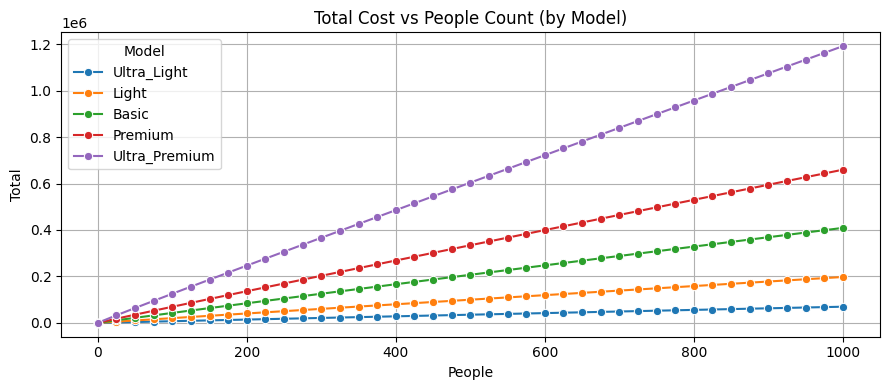

In [ ]:


plt.figure(figsize=(9,4))
sns.lineplot(data=df, x="People", y="Total", hue="Model", marker='o')
plt.title("Total Cost vs People Count (by Model)")
plt.grid(True)
plt.tight_layout()
plt.show()


* Average per person

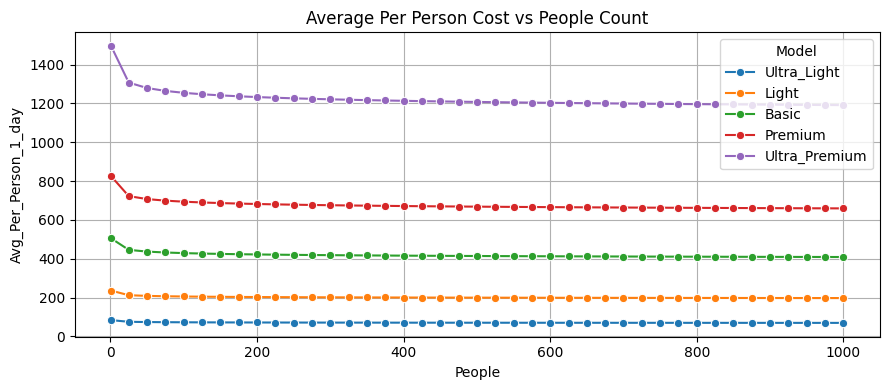

In [23]:
plt.figure(figsize=(9,4))
sns.lineplot(data=df, x="People", y="Avg_Per_Person_1_day", hue="Model", marker='o')
plt.title("Average Per Person Cost vs People Count")
plt.grid(True)
plt.tight_layout()
plt.show()
